# Import of python packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Original Data/earthquake_data.csv')
df.head(3)

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?","Do you think the ""Big One"" will occur in your lifetime?",Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 11 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   In general, how worried are you about earthquakes?                                                                                                    1013 non-null   object
 1   How worried are you about the Big One, a massive, catastrophic earthquake?                                                                            1013 non-null   object
 2   Do you think the "Big One" will occur in your lifetime?                                                                                               1013 non-null   object
 3 

In [7]:
df = df.rename(columns={'In general, how worried are you about earthquakes?' : 'Question 1',
                        'How worried are you about the Big One, a massive, catastrophic earthquake?' : 'Question 2',
                        'Do you think the "Big One" will occur in your lifetime?' : 'Question 3',
                        'Have you ever experienced an earthquake?' : 'Question 4',
                        'Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?' : 'Question 5',
                        'How familiar are you with the San Andreas Fault line?' : 'Question 6',
                        'How familiar are you with the Yellowstone Supervolcano?' : 'Question 7',
                        'What is your gender?': 'Gender',
                        'How much total combined money did all members of your HOUSEHOLD earn last year?' : 'Question 8'})
df.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Age,Gender,Question 8,US Region
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific
3,Not so worried,Not so worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",West South Central
4,Not so worried,Not so worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Extremely familiar,18 - 29,Male,"$200,000 and up",Middle Atlantic


In [8]:
new_df = df[['Question 2','Gender', 'Age']]
new_df = new_df.fillna('Answer not given')
new_df.head()


,Question 2,Gender,Age
0,Not so worried,Male,18 - 29
1,Very worried,Male,18 - 29
2,Somewhat worried,Male,18 - 29
3,Not so worried,Male,18 - 29
4,Not so worried,Male,18 - 29


# Pie graphs of answer for question: "Do you think the "Big One" will occur in your lifetime?"

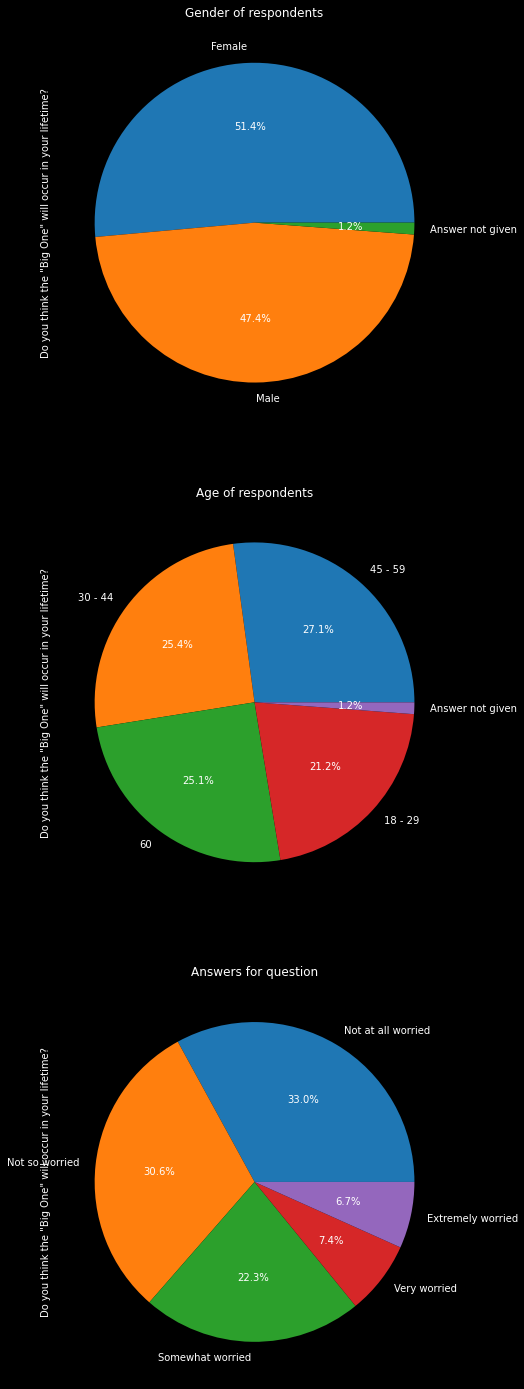

In [9]:
gender_counts = new_df.value_counts(new_df['Gender'])
age_counts = new_df.value_counts(new_df['Age'])
question_counts = new_df.value_counts(new_df['Question 2'])

fig = plt.figure(figsize=(8,25))
fig.set_facecolor('black')
plt.rcParams.update({'text.color': "white", 'axes.labelcolor' : "white"})


plt.subplot(311)
gender_counts.plot(kind='pie', ylabel = 'Do you think the "Big One" will occur in your lifetime?', autopct='%1.1f%%')
plt.title("Gender of respondents")
plt.subplot(312)
plt.title("Age of respondents")
age_counts.plot(kind='pie',ylabel = 'Do you think the "Big One" will occur in your lifetime?',autopct='%1.1f%%')
plt.subplot(313)
plt.title("Answers for question")
question_counts.plot(kind='pie',ylabel = 'Do you think the "Big One" will occur in your lifetime?',autopct='%1.1f%%')
plt.show()
fig.savefig('../Analysis Data/graphs.jpg')

# Saving output .csv file

In [10]:
new_df = new_df.rename(columns= {'Question 2' : 'Do you think the "Big One" will occur in your lifetime?'})
new_df.head()

new_df.to_csv('../Analysis Data/earthquake_output.csv')